In [689]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn
from matplotlib import pyplot as plt

In [690]:
data = pd.read_csv("titanic/train.csv")

In [691]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [692]:
target = data['Survived']

In [693]:
num_columns = ['Age', 'Fare']
cat_columns = ['Pclass','Sex', 'SibSp', 'Parch', 'Embarked']
str_columns = ['Name', 'Ticket',  'Cabin']

In [694]:
data.dropna().shape

(183, 12)

/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


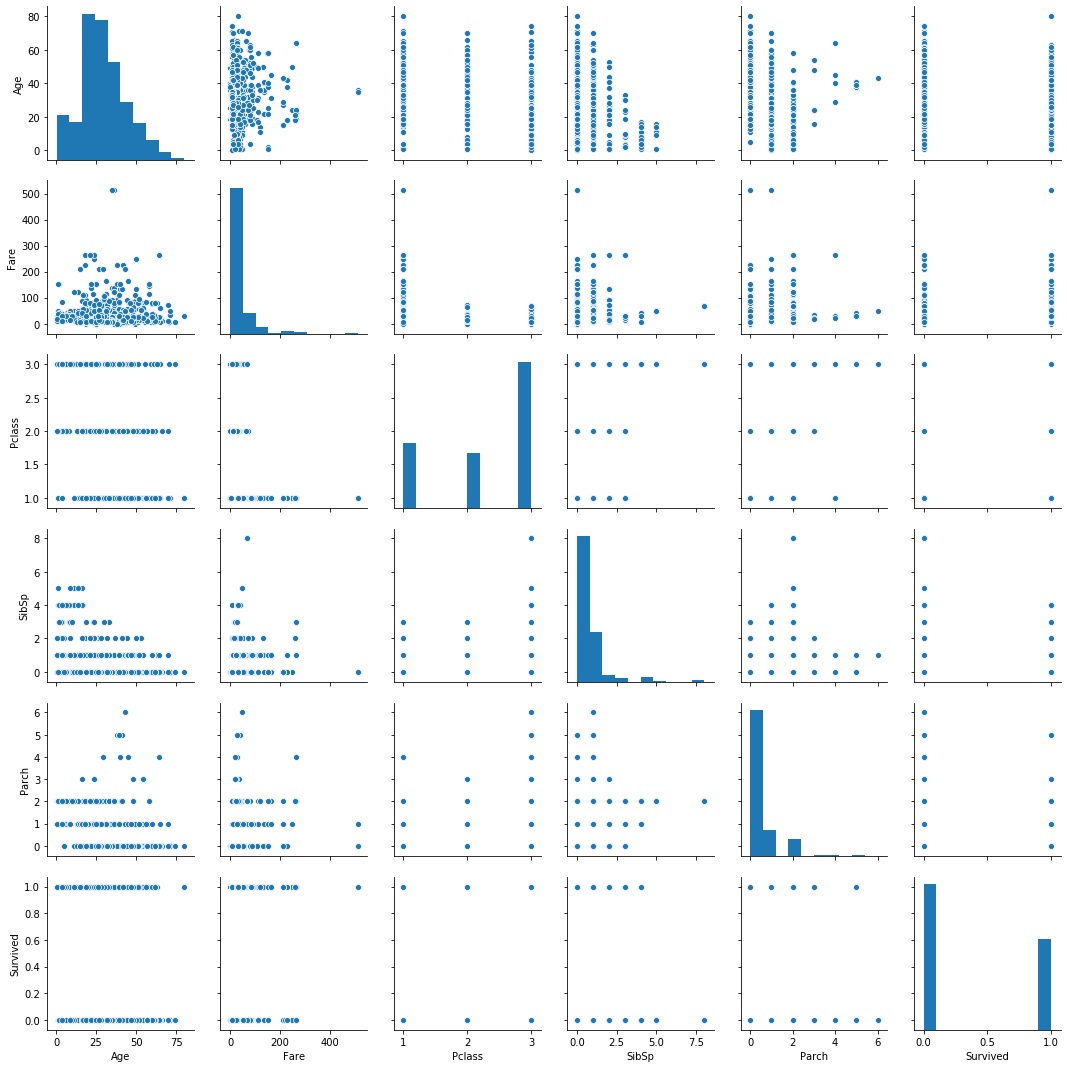

In [14]:
seaborn.pairplot(data[num_columns + cat_columns + ['Survived']])

In [695]:
data_mean = data[num_columns]
data_zeros = data[num_columns].fillna(0)

In [696]:
for col in data_mean.columns:
    data_mean[col].fillna(data_mean[col].mean(), inplace = True)

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [697]:
data_cat = data[cat_columns].fillna('NA').astype(str)

In [698]:
data_mean_cat = data[cat_columns].astype(str)
for col in data_mean_cat.columns:
    data_mean_cat[col].fillna(data_mean_cat[col].mode(), inplace = True)

In [699]:
from sklearn.feature_extraction import DictVectorizer as DV

In [700]:
encoder_1 = DV(sparse = False)
data_cat_oh = encoder.fit_transform(data_cat.T.to_dict().values())

encoder_2 = DV(sparse = False)
data_mean_cat_oh = encoder_2.fit_transform(data_mean_cat.T.to_dict().values())

In [701]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(data_zeros, target, 
                                     test_size=0.3, 
                                     random_state=0, stratify = np.array(target))
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(data_mean, 
                                      test_size=0.3, 
                                      random_state=0, stratify = np.array(target))
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(data_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify = np.array(target))

(X_train_mean_cat_oh,
 X_test_mean_cat_oh) = train_test_split(data_mean_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify = np.array(target))

In [702]:
scaler_zeros = StandardScaler()
scaler_mean = StandardScaler()

train_data_zeros = np.column_stack((scaler_zeros.fit_transform(X_train_real_zeros),  X_train_cat_oh))
train_data_mean = np.column_stack((scaler_mean.fit_transform(X_train_real_mean),  X_train_mean_cat_oh))
test_data_zeros =  np.column_stack((scaler_zeros.transform(X_test_real_zeros),  X_test_cat_oh))
test_data_mean =  np.column_stack((scaler_mean.transform(X_test_real_mean),  X_test_mean_cat_oh))

In [703]:
np.random.seed(0)
indices_to_add = np.random.randint(np.sum(y_train == 1), size = np.sum(y_train==0)-np.sum(y_train==1))

X_train_to_add = train_data_zeros[y_train.as_matrix() == 1,:][indices_to_add,:]
y_add = np.ones(np.sum(y_train==0)-np.sum(y_train==1))
train_balanced = np.append(train_data_zeros, X_train_to_add, axis = 0)
y_balanced = np.append(y_train, y_add)

/Users/maxim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [704]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras

In [705]:
model = keras.Sequential([
    keras.layers.Dense(200, activation = "softmax"),
    keras.layers.Dense(100, activation='softmax'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [611]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [612]:
acc = []
for epoch in range(1, 200, 1):
    model.fit(train_balanced, y_balanced, epochs= 1)
    test_loss, test_acc = model.evaluate(test_data_zeros, np.array(y_test))
    acc.append(test_acc)

Epoch 1/1
268/268 [==============================] - 0s 167us/step
Epoch 1/1
268/268 [==============================] - 0s 153us/step
Epoch 1/1
268/268 [==============================] - 0s 151us/step
Epoch 1/1
268/268 [==============================] - 0s 192us/step
Epoch 1/1
268/268 [==============================] - 0s 156us/step
Epoch 1/1
268/268 [==============================] - 0s 178us/step
Epoch 1/1
268/268 [==============================] - 0s 162us/step
Epoch 1/1
268/268 [==============================] - 0s 155us/step
Epoch 1/1
268/268 [==============================] - 0s 155us/step
Epoch 1/1
268/268 [==============================] - 0s 154us/step
Epoch 1/1
268/268 [==============================] - 0s 157us/step
Epoch 1/1
268/268 [==============================] - 0s 156us/step
Epoch 1/1
268/268 [==============================] - 0s 158us/step
Epoch 1/1
268/268 [==============================] - 0s 156us/step
Epoch 1/1
268/268 [==============================] - 0s 158us/

KeyboardInterrupt: 

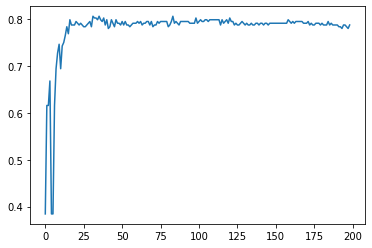

In [582]:
plt.plot(acc)

In [568]:
test_loss, test_acc = model.evaluate(test_data_zeros, np.array(y_test))

268/268 [==============================] - 0s 178us/step


In [569]:
test_acc

0.8022388077493924

In [181]:
ans

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0])

In [498]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn import tree, metrics
from sklearn import ensemble
from sklearn import neighbors
import xgboost as xgb
import random
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
random_forest = tree.DecisionTreeClassifier()
cross_score_ans_1 = cross_val_score(random_forest, train_balanced, y_balanced, cv = 10)

In [141]:
cross_score_ans_1.mean()

0.8429824561403508

In [142]:
random_forest_2 = ensemble.BaggingClassifier(random_forest, n_estimators = 100)

In [143]:
cross_score_ans_2 = cross_val_score(random_forest_2, train_balanced, y_balanced, cv = 10)

In [144]:
cross_score_ans_2.mean()

0.8584008097165992

In [154]:
random_forest_3 = ensemble.BaggingClassifier(random_forest, n_estimators = 100, max_features = 25)
cross_score_ans_3 = cross_val_score(random_forest_3, train_balanced, y_balanced, cv = 10)

In [155]:
cross_score_ans_3.mean()

0.8597503373819162

In [164]:
random_forest_4 = tree.DecisionTreeClassifier(max_features = 15)
random_forest_4 = ensemble.BaggingClassifier(random_forest_4, n_estimators = 100)
cross_score_ans_4 = cross_val_score(random_forest_4, train_balanced, y_balanced, cv = 10)

In [165]:
cross_score_ans_4.mean()

0.867476383265857

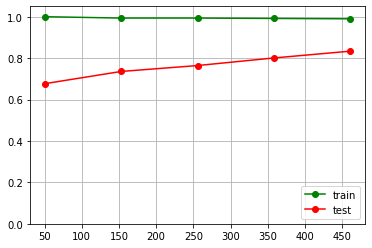

In [167]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 200, max_depth = 15, random_state = 1)

train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, train_balanced, y_balanced, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

In [168]:
cross_score_ans_5 = cross_val_score(rf_classifier_low_depth, train_balanced, y_balanced, cv = 10)

In [169]:
cross_score_ans_5.mean()

0.8596491228070174

In [585]:
%%time
lrs = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.85, 0.87, 0.9, 0.93, 0.95, 0.99]
sc = []
for lr in lrs:
    n_trees = [1] + [i for i in range(10, 100, 5)] 
    xgb_scoring = []
    for n_tree in n_trees:
        estimator = GradientBoostingClassifier(learning_rate=lr)
        score = cross_val_score(estimator, train_balanced, y_balanced, 
                                                 scoring = 'accuracy', cv = 3)    
        xgb_scoring.append(score)
    xgb_scoring = np.asmatrix(xgb_scoring)
    sc.append(xgb_scoring.mean())

CPU times: user 40.5 s, sys: 79.5 ms, total: 40.6 s
Wall time: 40.7 s


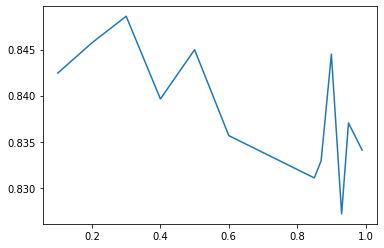

In [586]:
plt.plot(lrs, sc)

In [706]:
class ensemble_for_titanic:
    def __init__(self, n_trees = 10, n_neural = 11, n_xgb = 10, n_neigh = 0, n_grad_boost = 0):
        self.n_trees = n_trees
        self.n_neural = n_neural
        self.n_xgb = n_xgb
        self.n_neigh = n_neigh
        self.n_grad_boost = n_grad_boost
        self.params_tree = {
            "n_est" : [50, 250],
            "max_depth" : [5, 25],
            "size" : [1, 1],
            "f":[1, 1]
        }
        
        self.params_net = {
            "epoches" : [200, 250],
            "size" : [0.9, 1],
            "f":[0.9, 1]
            
        }
        self.params_xgb = {
            "lr" : [0.85, 0.95],
            "n_est" : [50, 250],
            "max_depth" : [5, 25],
            "size" : [1, 1],
            "f":[1, 1]
        }
        
        self.params_neigh = {
            "k" : [1, 10],
            "size" : [0.8, 1],
            "f":[0.8, 1]
        }
        
        self.params_grad_boost = {
            "lr" : [0.2, 0.4],
            "n_est" : [100, 250],
            "size" : [1, 1],
            "f":[1, 1]
        }
        
        
        
    def fit(self, X, y):
        self.models = []
        self.idx = []
        for _ in range(self.n_trees):
            n_est = int(self.params_tree["n_est"][0] + random.random()*(self.params_tree["n_est"][1] - self.params_tree["n_est"][0]))
            depth = int(self.params_tree["max_depth"][0] + random.random()*(self.params_tree["max_depth"][1] - self.params_tree["max_depth"][0]))
            
            idx = np.linspace(0, X.shape[0]-1, X.shape[0], dtype = int)
            random.shuffle(idx)
            size = self.params_tree["size"][0] + random.random()*(self.params_tree["size"][1] - self.params_tree["size"][0])
            idx = idx[:int(size*X.shape[0])]
            
            
            idx2 = np.linspace(0, X.shape[1]-1, X.shape[1], dtype = int)
            random.shuffle(idx2)
            size = self.params_tree["f"][0] + random.random()*(self.params_tree["f"][1] - self.params_tree["f"][0])
            idx2 = idx2[:int(size*X.shape[1])]
            self.idx.append(idx2)
            

            
            rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = n_est, max_depth = depth)

            
            rf_classifier_low_depth.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(rf_classifier_low_depth)
        for _ in range(self.n_neural):
            
            
            model = keras.Sequential([
                keras.layers.Dense(200, activation = "softmax"),
                keras.layers.Dense(100, activation='softmax'),
                keras.layers.Dense(50, activation='relu'),
                keras.layers.Dense(2, activation='softmax')
            ])
            model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            epoch = int(self.params_net["epoches"][0] + random.random()*(self.params_net["epoches"][1] - self.params_net["epoches"][0]))
            
            idx = np.linspace(0, X.shape[0]-1, X.shape[0], dtype = int)
            random.shuffle(idx)
            size = self.params_net["size"][0] + random.random()*(self.params_net["size"][1] - self.params_net["size"][0])
            idx = idx[:int(size*X.shape[0])]
            
            
            idx2 = np.linspace(0, X.shape[1]-1, X.shape[1], dtype = int)
            random.shuffle(idx2)
            size = self.params_net["f"][0] + random.random()*(self.params_net["f"][1] - self.params_net["f"][0])
            idx2 = idx2[:int(size*X.shape[1])]
            self.idx.append(idx2)
            
            model.fit(X[idx,:][:, idx2], y[idx], epochs=epoch)
            self.models.append(model)
            
        for _ in range(self.n_xgb):
            lr = self.params_xgb["lr"][0] + random.random()*(self.params_xgb["lr"][1] - self.params_xgb["lr"][0])
            n_est = int(self.params_xgb["n_est"][0] + random.random()*(self.params_xgb["n_est"][1] - self.params_xgb["n_est"][0]))
            depth = int(self.params_xgb["max_depth"][0] + random.random()*(self.params_xgb["max_depth"][1] - self.params_xgb["max_depth"][0]))
            
            idx = np.linspace(0, X.shape[0]-1, X.shape[0], dtype = int)
            random.shuffle(idx)
            size = self.params_xgb["size"][0] + random.random()*(self.params_xgb["size"][1] - self.params_xgb["size"][0])
            idx = idx[:int(size*X.shape[0])]
            
            
            idx2 = np.linspace(0, X.shape[1]-1, X.shape[1], dtype = int)
            random.shuffle(idx2)
            size = self.params_xgb["f"][0] + random.random()*(self.params_xgb["f"][1] - self.params_xgb["f"][0])
            idx2 = idx2[:int(size*X.shape[1])]
            self.idx.append(idx2)
            
            
            model = xgb.XGBClassifier(learning_rate=lr, max_depth=depth, n_estimators=n_est, min_child_weight=3)
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
        
        for _ in range(self.n_neigh):
            idx = np.linspace(0, X.shape[0]-1, X.shape[0], dtype = int)
            random.shuffle(idx)
            size = self.params_neigh["size"][0] + random.random()*(self.params_neigh["size"][1] - self.params_neigh["size"][0])
            idx = idx[:int(size*X.shape[0])]
            
            
            idx2 = np.linspace(0, X.shape[1]-1, X.shape[1], dtype = int)
            random.shuffle(idx2)
            size = self.params_neigh["f"][0] + random.random()*(self.params_neigh["f"][1] - self.params_neigh["f"][0])
            idx2 = idx2[:int(size*X.shape[1])]
            self.idx.append(idx2)
            
            k = int(self.params_neigh["k"][0] + random.random()*(self.params_neigh["k"][1] - self.params_neigh["k"][0]))
            
            model = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
            
            
            
        for _ in range(self.n_grad_boost):
            lr = self.params_grad_boost["lr"][0] + random.random()*(self.params_grad_boost["lr"][1] - self.params_grad_boost["lr"][0])


            n_est = int(self.params_grad_boost["n_est"][0] + random.random()*(self.params_grad_boost["n_est"][1] - self.params_grad_boost["n_est"][0]))
            
            idx = np.linspace(0, X.shape[0]-1, X.shape[0], dtype = int)
            random.shuffle(idx)
            size = self.params_grad_boost["size"][0] + random.random()*(self.params_grad_boost["size"][1] - self.params_grad_boost["size"][0])
            idx = idx[:int(size*X.shape[0])]
            
            
            idx2 = np.linspace(0, X.shape[1]-1, X.shape[1], dtype = int)
            random.shuffle(idx2)
            size = self.params_grad_boost["f"][0] + random.random()*(self.params_grad_boost["f"][1] - self.params_grad_boost["f"][0])
            idx2 = idx2[:int(size*X.shape[1])]
            self.idx.append(idx2)
            
            model = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_est)
            
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
            
    def predict(self, X):
        prediction = []
        for i in range(self.n_trees):
            X_predicted = self.models[i].predict(X[:,self.idx[i]])
            prediction.append(X_predicted)
    
        for i in range(self.n_neural):
            ans = self.models[i + self.n_trees].predict_classes(X[:,self.idx[i+self.n_trees]])
            prediction.append(ans)
            
        for i in range(self.n_xgb):
            
            ans = self.models[i + self.n_trees + self.n_neural].predict(X[:,self.idx[i+self.n_trees+self.n_neural]])
            
            prediction.append(ans)
            
        for i in range(self.n_neigh):
            
            ans = self.models[i + self.n_trees + self.n_neural + self.n_xgb].predict(X[:,self.idx[i+self.n_trees+self.n_neural+self.n_xgb]])
            
            prediction.append(ans)
            
        for i in range(self.n_grad_boost):
            
            ans = self.models[i + self.n_trees + self.n_neural + self.n_xgb + self.n_neigh].predict(X[:,self.idx[i+self.n_trees+self.n_neural+self.n_xgb + self.n_neigh]])
            
            prediction.append(ans)
            
        return prediction, self.make_prediction(prediction)
    
    
    def make_prediction(self, prediction):
        final = np.zeros(len(prediction[0]))
        prediction = np.array(prediction)
        size = len(prediction[0])
        prediction = prediction.T
        for i in range(size):
            if (prediction[i].mean() > 0.5):
                final[i] = 1
            else :
                final[i] = 0
            
        
        return final

In [804]:
est = ensemble_for_titanic(n_trees = 10, n_neural = 11, n_xgb = 10, n_neigh= 0, n_grad_boost=11)

In [805]:
# est.fit(np.vstack((train_balanced,test_data_zeros)), np.append(y_balanced,y_test)) #for submission
est.fit(train_data_mean, np.array(y_train))

Epoch 1/212
588/588 [==============================] - 1s 1ms/step - loss: 0.6821 - acc: 0.6207
Epoch 2/212
588/588 [==============================] - 0s 308us/step - loss: 0.6699 - acc: 0.6207
Epoch 3/212
588/588 [==============================] - 0s 296us/step - loss: 0.6665 - acc: 0.6207
Epoch 4/212
588/588 [==============================] - 0s 294us/step - loss: 0.6639 - acc: 0.6207
Epoch 5/212
588/588 [==============================] - 0s 292us/step - loss: 0.6637 - acc: 0.6207
Epoch 6/212
588/588 [==============================] - 0s 295us/step - loss: 0.6636 - acc: 0.6207
Epoch 7/212
588/588 [==============================] - 0s 297us/step - loss: 0.6636 - acc: 0.6207
Epoch 8/212
588/588 [==============================] - 0s 293us/step - loss: 0.6637 - acc: 0.6207
Epoch 9/212
588/588 [==============================] - 0s 292us/step - loss: 0.6636 - acc: 0.6207
Epoch 10/212
588/588 [==============================] - 0s 295us/step - loss: 0.6631 - acc: 0.6207
Epoch 11/212
588/588 

588/588 [==============================] - 0s 294us/step - loss: 0.3893 - acc: 0.8367
Epoch 84/212
588/588 [==============================] - 0s 289us/step - loss: 0.3900 - acc: 0.8350
Epoch 85/212
588/588 [==============================] - 0s 287us/step - loss: 0.3888 - acc: 0.8316
Epoch 86/212
588/588 [==============================] - 0s 291us/step - loss: 0.3864 - acc: 0.8367
Epoch 87/212
588/588 [==============================] - 0s 291us/step - loss: 0.3856 - acc: 0.8333
Epoch 88/212
588/588 [==============================] - 0s 294us/step - loss: 0.3857 - acc: 0.8367
Epoch 89/212
588/588 [==============================] - 0s 288us/step - loss: 0.3847 - acc: 0.8384
Epoch 90/212
588/588 [==============================] - 0s 290us/step - loss: 0.3848 - acc: 0.8350
Epoch 91/212
588/588 [==============================] - 0s 291us/step - loss: 0.3833 - acc: 0.8401
Epoch 92/212
588/588 [==============================] - 0s 293us/step - loss: 0.3832 - acc: 0.8384
Epoch 93/212
588/588 [=

588/588 [==============================] - 0s 301us/step - loss: 0.3447 - acc: 0.8486
Epoch 166/212
588/588 [==============================] - 0s 297us/step - loss: 0.3440 - acc: 0.8469
Epoch 167/212
588/588 [==============================] - 0s 300us/step - loss: 0.3439 - acc: 0.8452
Epoch 168/212
588/588 [==============================] - 0s 300us/step - loss: 0.3431 - acc: 0.8486
Epoch 169/212
588/588 [==============================] - 0s 299us/step - loss: 0.3430 - acc: 0.8452
Epoch 170/212
588/588 [==============================] - 0s 301us/step - loss: 0.3426 - acc: 0.8469
Epoch 171/212
588/588 [==============================] - 0s 299us/step - loss: 0.3417 - acc: 0.8503
Epoch 172/212
588/588 [==============================] - 0s 295us/step - loss: 0.3414 - acc: 0.8469
Epoch 173/212
588/588 [==============================] - 0s 297us/step - loss: 0.3410 - acc: 0.8554
Epoch 174/212
588/588 [==============================] - 0s 299us/step - loss: 0.3422 - acc: 0.8452
Epoch 175/212


598/598 [==============================] - 0s 297us/step - loss: 0.4706 - acc: 0.8027
Epoch 36/235
598/598 [==============================] - 0s 296us/step - loss: 0.4678 - acc: 0.8060
Epoch 37/235
598/598 [==============================] - 0s 295us/step - loss: 0.4634 - acc: 0.8094
Epoch 38/235
598/598 [==============================] - 0s 295us/step - loss: 0.4597 - acc: 0.8110
Epoch 39/235
598/598 [==============================] - 0s 288us/step - loss: 0.4564 - acc: 0.8094
Epoch 40/235
598/598 [==============================] - 0s 294us/step - loss: 0.4537 - acc: 0.8110
Epoch 41/235
598/598 [==============================] - 0s 295us/step - loss: 0.4509 - acc: 0.8127
Epoch 42/235
598/598 [==============================] - 0s 298us/step - loss: 0.4480 - acc: 0.8161
Epoch 43/235
598/598 [==============================] - 0s 289us/step - loss: 0.4456 - acc: 0.8144
Epoch 44/235
598/598 [==============================] - 0s 292us/step - loss: 0.4427 - acc: 0.8177
Epoch 45/235
598/598 [=

598/598 [==============================] - 0s 297us/step - loss: 0.3692 - acc: 0.8562
Epoch 118/235
598/598 [==============================] - 0s 297us/step - loss: 0.3678 - acc: 0.8528
Epoch 119/235
598/598 [==============================] - 0s 295us/step - loss: 0.3670 - acc: 0.8528
Epoch 120/235
598/598 [==============================] - 0s 294us/step - loss: 0.3666 - acc: 0.8512
Epoch 121/235
598/598 [==============================] - 0s 297us/step - loss: 0.3660 - acc: 0.8528
Epoch 122/235
598/598 [==============================] - 0s 295us/step - loss: 0.3660 - acc: 0.8528
Epoch 123/235
598/598 [==============================] - 0s 298us/step - loss: 0.3652 - acc: 0.8562
Epoch 124/235
598/598 [==============================] - 0s 297us/step - loss: 0.3656 - acc: 0.8545
Epoch 125/235
598/598 [==============================] - 0s 293us/step - loss: 0.3648 - acc: 0.8512
Epoch 126/235
598/598 [==============================] - 0s 298us/step - loss: 0.3645 - acc: 0.8562
Epoch 127/235


598/598 [==============================] - 0s 300us/step - loss: 0.3314 - acc: 0.8612
Epoch 200/235
598/598 [==============================] - 0s 295us/step - loss: 0.3316 - acc: 0.8579
Epoch 201/235
598/598 [==============================] - 0s 297us/step - loss: 0.3305 - acc: 0.8595
Epoch 202/235
598/598 [==============================] - 0s 294us/step - loss: 0.3302 - acc: 0.8612
Epoch 203/235
598/598 [==============================] - 0s 297us/step - loss: 0.3289 - acc: 0.8612
Epoch 204/235
598/598 [==============================] - 0s 297us/step - loss: 0.3313 - acc: 0.8612
Epoch 205/235
598/598 [==============================] - 0s 295us/step - loss: 0.3337 - acc: 0.8645
Epoch 206/235
598/598 [==============================] - 0s 301us/step - loss: 0.3306 - acc: 0.8679
Epoch 207/235
598/598 [==============================] - 0s 296us/step - loss: 0.3310 - acc: 0.8629
Epoch 208/235
598/598 [==============================] - 0s 289us/step - loss: 0.3270 - acc: 0.8645
Epoch 209/235


610/610 [==============================] - 0s 311us/step - loss: 0.4371 - acc: 0.8164
Epoch 47/226
610/610 [==============================] - 0s 302us/step - loss: 0.4330 - acc: 0.8197
Epoch 48/226
610/610 [==============================] - 0s 308us/step - loss: 0.4348 - acc: 0.8148
Epoch 49/226
610/610 [==============================] - 0s 308us/step - loss: 0.4304 - acc: 0.8213
Epoch 50/226
610/610 [==============================] - 0s 310us/step - loss: 0.4284 - acc: 0.8230
Epoch 51/226
610/610 [==============================] - 0s 310us/step - loss: 0.4285 - acc: 0.8197
Epoch 52/226
610/610 [==============================] - 0s 311us/step - loss: 0.4268 - acc: 0.8180
Epoch 53/226
610/610 [==============================] - 0s 308us/step - loss: 0.4250 - acc: 0.8230
Epoch 54/226
610/610 [==============================] - 0s 308us/step - loss: 0.4230 - acc: 0.8262
Epoch 55/226
610/610 [==============================] - 0s 310us/step - loss: 0.4234 - acc: 0.8180
Epoch 56/226
610/610 [=

610/610 [==============================] - 0s 310us/step - loss: 0.3814 - acc: 0.8410
Epoch 129/226
610/610 [==============================] - 0s 309us/step - loss: 0.3802 - acc: 0.8361
Epoch 130/226
610/610 [==============================] - 0s 309us/step - loss: 0.3807 - acc: 0.8426
Epoch 131/226
610/610 [==============================] - 0s 308us/step - loss: 0.3814 - acc: 0.8492
Epoch 132/226
610/610 [==============================] - 0s 308us/step - loss: 0.3792 - acc: 0.8426
Epoch 133/226
610/610 [==============================] - 0s 307us/step - loss: 0.3806 - acc: 0.8377
Epoch 134/226
610/610 [==============================] - 0s 307us/step - loss: 0.3791 - acc: 0.8426
Epoch 135/226
610/610 [==============================] - 0s 305us/step - loss: 0.3785 - acc: 0.8492
Epoch 136/226
610/610 [==============================] - 0s 308us/step - loss: 0.3777 - acc: 0.8426
Epoch 137/226
610/610 [==============================] - 0s 306us/step - loss: 0.3784 - acc: 0.8475
Epoch 138/226


610/610 [==============================] - 0s 301us/step - loss: 0.3625 - acc: 0.8426
Epoch 211/226
610/610 [==============================] - 0s 306us/step - loss: 0.3627 - acc: 0.8443
Epoch 212/226
610/610 [==============================] - 0s 308us/step - loss: 0.3626 - acc: 0.8459
Epoch 213/226
610/610 [==============================] - 0s 302us/step - loss: 0.3610 - acc: 0.8443
Epoch 214/226
610/610 [==============================] - 0s 300us/step - loss: 0.3617 - acc: 0.8426
Epoch 215/226
610/610 [==============================] - 0s 309us/step - loss: 0.3628 - acc: 0.8410
Epoch 216/226
610/610 [==============================] - 0s 308us/step - loss: 0.3648 - acc: 0.8508
Epoch 217/226
610/610 [==============================] - 0s 309us/step - loss: 0.3614 - acc: 0.8459
Epoch 218/226
610/610 [==============================] - 0s 311us/step - loss: 0.3633 - acc: 0.8426
Epoch 219/226
610/610 [==============================] - 0s 308us/step - loss: 0.3608 - acc: 0.8443
Epoch 220/226


565/565 [==============================] - 0s 301us/step - loss: 0.3946 - acc: 0.8301
Epoch 67/201
565/565 [==============================] - 0s 302us/step - loss: 0.3937 - acc: 0.8372
Epoch 68/201
565/565 [==============================] - 0s 289us/step - loss: 0.3920 - acc: 0.8372
Epoch 69/201
565/565 [==============================] - 0s 298us/step - loss: 0.3919 - acc: 0.8389
Epoch 70/201
565/565 [==============================] - 0s 293us/step - loss: 0.3912 - acc: 0.8354
Epoch 71/201
565/565 [==============================] - 0s 298us/step - loss: 0.3911 - acc: 0.8336
Epoch 72/201
565/565 [==============================] - 0s 297us/step - loss: 0.3904 - acc: 0.8389
Epoch 73/201
565/565 [==============================] - 0s 296us/step - loss: 0.3894 - acc: 0.8407
Epoch 74/201
565/565 [==============================] - 0s 297us/step - loss: 0.3895 - acc: 0.8425
Epoch 75/201
565/565 [==============================] - 0s 299us/step - loss: 0.3900 - acc: 0.8319
Epoch 76/201
565/565 [=

565/565 [==============================] - 0s 300us/step - loss: 0.3505 - acc: 0.8478
Epoch 149/201
565/565 [==============================] - 0s 298us/step - loss: 0.3500 - acc: 0.8478
Epoch 150/201
565/565 [==============================] - 0s 297us/step - loss: 0.3503 - acc: 0.8478
Epoch 151/201
565/565 [==============================] - 0s 298us/step - loss: 0.3512 - acc: 0.8407
Epoch 152/201
565/565 [==============================] - 0s 296us/step - loss: 0.3498 - acc: 0.8460
Epoch 153/201
565/565 [==============================] - 0s 298us/step - loss: 0.3470 - acc: 0.8478
Epoch 154/201
565/565 [==============================] - 0s 297us/step - loss: 0.3478 - acc: 0.8513
Epoch 155/201
565/565 [==============================] - 0s 296us/step - loss: 0.3468 - acc: 0.8496
Epoch 156/201
565/565 [==============================] - 0s 296us/step - loss: 0.3459 - acc: 0.8513
Epoch 157/201
565/565 [==============================] - 0s 300us/step - loss: 0.3455 - acc: 0.8496
Epoch 158/201


588/588 [==============================] - 0s 301us/step - loss: 0.5285 - acc: 0.7789
Epoch 30/232
588/588 [==============================] - 0s 296us/step - loss: 0.5181 - acc: 0.7721
Epoch 31/232
588/588 [==============================] - 0s 300us/step - loss: 0.5062 - acc: 0.7789
Epoch 32/232
588/588 [==============================] - 0s 304us/step - loss: 0.4977 - acc: 0.7840
Epoch 33/232
588/588 [==============================] - 0s 304us/step - loss: 0.4897 - acc: 0.7874
Epoch 34/232
588/588 [==============================] - 0s 300us/step - loss: 0.4823 - acc: 0.7908
Epoch 35/232
588/588 [==============================] - 0s 303us/step - loss: 0.4762 - acc: 0.7959
Epoch 36/232
588/588 [==============================] - 0s 302us/step - loss: 0.4712 - acc: 0.7976
Epoch 37/232
588/588 [==============================] - 0s 300us/step - loss: 0.4674 - acc: 0.8027
Epoch 38/232
588/588 [==============================] - 0s 300us/step - loss: 0.4647 - acc: 0.8027
Epoch 39/232
588/588 [=

588/588 [==============================] - 0s 300us/step - loss: 0.3856 - acc: 0.8435
Epoch 112/232
588/588 [==============================] - 0s 300us/step - loss: 0.3835 - acc: 0.8418
Epoch 113/232
588/588 [==============================] - 0s 301us/step - loss: 0.3854 - acc: 0.8299
Epoch 114/232
588/588 [==============================] - 0s 302us/step - loss: 0.3828 - acc: 0.8401
Epoch 115/232
588/588 [==============================] - 0s 301us/step - loss: 0.3837 - acc: 0.8435
Epoch 116/232
588/588 [==============================] - 0s 301us/step - loss: 0.3818 - acc: 0.8418
Epoch 117/232
588/588 [==============================] - 0s 300us/step - loss: 0.3815 - acc: 0.8384
Epoch 118/232
588/588 [==============================] - 0s 304us/step - loss: 0.3801 - acc: 0.8435
Epoch 119/232
588/588 [==============================] - 0s 302us/step - loss: 0.3800 - acc: 0.8452
Epoch 120/232
588/588 [==============================] - 0s 301us/step - loss: 0.3821 - acc: 0.8333
Epoch 121/232


588/588 [==============================] - 0s 289us/step - loss: 0.3548 - acc: 0.8418
Epoch 194/232
588/588 [==============================] - 0s 286us/step - loss: 0.3548 - acc: 0.8469
Epoch 195/232
588/588 [==============================] - 0s 287us/step - loss: 0.3533 - acc: 0.8503
Epoch 196/232
588/588 [==============================] - 0s 287us/step - loss: 0.3548 - acc: 0.8452
Epoch 197/232
588/588 [==============================] - 0s 287us/step - loss: 0.3548 - acc: 0.8469
Epoch 198/232
588/588 [==============================] - 0s 288us/step - loss: 0.3527 - acc: 0.8520
Epoch 199/232
588/588 [==============================] - 0s 293us/step - loss: 0.3537 - acc: 0.8435
Epoch 200/232
588/588 [==============================] - 0s 289us/step - loss: 0.3524 - acc: 0.8520
Epoch 201/232
588/588 [==============================] - 0s 286us/step - loss: 0.3530 - acc: 0.8486
Epoch 202/232
588/588 [==============================] - 0s 290us/step - loss: 0.3539 - acc: 0.8520
Epoch 203/232


582/582 [==============================] - 0s 304us/step - loss: 0.4907 - acc: 0.7990
Epoch 44/225
582/582 [==============================] - 0s 304us/step - loss: 0.4895 - acc: 0.8093
Epoch 45/225
582/582 [==============================] - 0s 303us/step - loss: 0.4865 - acc: 0.8110
Epoch 46/225
582/582 [==============================] - 0s 303us/step - loss: 0.4849 - acc: 0.8144
Epoch 47/225
582/582 [==============================] - 0s 301us/step - loss: 0.4834 - acc: 0.8127
Epoch 48/225
582/582 [==============================] - 0s 305us/step - loss: 0.4818 - acc: 0.8127
Epoch 49/225
582/582 [==============================] - 0s 302us/step - loss: 0.4783 - acc: 0.8196
Epoch 50/225
582/582 [==============================] - 0s 303us/step - loss: 0.4770 - acc: 0.8196
Epoch 51/225
582/582 [==============================] - 0s 303us/step - loss: 0.4754 - acc: 0.8179
Epoch 52/225
582/582 [==============================] - 0s 300us/step - loss: 0.4730 - acc: 0.8213
Epoch 53/225
582/582 [=

582/582 [==============================] - 0s 303us/step - loss: 0.3885 - acc: 0.8436
Epoch 126/225
582/582 [==============================] - 0s 300us/step - loss: 0.3874 - acc: 0.8488
Epoch 127/225
582/582 [==============================] - 0s 302us/step - loss: 0.3878 - acc: 0.8454
Epoch 128/225
582/582 [==============================] - 0s 299us/step - loss: 0.3866 - acc: 0.8419
Epoch 129/225
582/582 [==============================] - 0s 300us/step - loss: 0.3864 - acc: 0.8454
Epoch 130/225
582/582 [==============================] - 0s 303us/step - loss: 0.3855 - acc: 0.8471
Epoch 131/225
582/582 [==============================] - 0s 305us/step - loss: 0.3853 - acc: 0.8419
Epoch 132/225
582/582 [==============================] - 0s 306us/step - loss: 0.3841 - acc: 0.8488
Epoch 133/225
582/582 [==============================] - 0s 301us/step - loss: 0.3840 - acc: 0.8454
Epoch 134/225
582/582 [==============================] - 0s 299us/step - loss: 0.3838 - acc: 0.8454
Epoch 135/225


582/582 [==============================] - 0s 305us/step - loss: 0.3495 - acc: 0.8419
Epoch 208/225
582/582 [==============================] - 0s 305us/step - loss: 0.3493 - acc: 0.8436
Epoch 209/225
582/582 [==============================] - 0s 304us/step - loss: 0.3492 - acc: 0.8436
Epoch 210/225
582/582 [==============================] - 0s 301us/step - loss: 0.3506 - acc: 0.8436
Epoch 211/225
582/582 [==============================] - 0s 301us/step - loss: 0.3486 - acc: 0.8488
Epoch 212/225
582/582 [==============================] - 0s 304us/step - loss: 0.3490 - acc: 0.8505
Epoch 213/225
582/582 [==============================] - 0s 288us/step - loss: 0.3491 - acc: 0.8454
Epoch 214/225
582/582 [==============================] - 0s 307us/step - loss: 0.3462 - acc: 0.8454
Epoch 215/225
582/582 [==============================] - 0s 302us/step - loss: 0.3483 - acc: 0.8419
Epoch 216/225
582/582 [==============================] - 0s 301us/step - loss: 0.3469 - acc: 0.8471
Epoch 217/225


577/577 [==============================] - 0s 305us/step - loss: 0.4726 - acc: 0.8267
Epoch 65/242
577/577 [==============================] - 0s 303us/step - loss: 0.4696 - acc: 0.8302
Epoch 66/242
577/577 [==============================] - 0s 302us/step - loss: 0.4686 - acc: 0.8267
Epoch 67/242
577/577 [==============================] - 0s 303us/step - loss: 0.4672 - acc: 0.8267
Epoch 68/242
577/577 [==============================] - 0s 306us/step - loss: 0.4661 - acc: 0.8180
Epoch 69/242
577/577 [==============================] - 0s 303us/step - loss: 0.4656 - acc: 0.8232
Epoch 70/242
577/577 [==============================] - 0s 303us/step - loss: 0.4627 - acc: 0.8267
Epoch 71/242
577/577 [==============================] - 0s 303us/step - loss: 0.4617 - acc: 0.8267
Epoch 72/242
577/577 [==============================] - 0s 303us/step - loss: 0.4601 - acc: 0.8267
Epoch 73/242
577/577 [==============================] - 0s 305us/step - loss: 0.4589 - acc: 0.8284
Epoch 74/242
577/577 [=

577/577 [==============================] - 0s 302us/step - loss: 0.4114 - acc: 0.8354
Epoch 147/242
577/577 [==============================] - 0s 303us/step - loss: 0.4091 - acc: 0.8302
Epoch 148/242
577/577 [==============================] - 0s 302us/step - loss: 0.4159 - acc: 0.8198
Epoch 149/242
577/577 [==============================] - 0s 303us/step - loss: 0.4106 - acc: 0.8284
Epoch 150/242
577/577 [==============================] - 0s 305us/step - loss: 0.4070 - acc: 0.8440
Epoch 151/242
577/577 [==============================] - 0s 304us/step - loss: 0.4066 - acc: 0.8423
Epoch 152/242
577/577 [==============================] - 0s 304us/step - loss: 0.4086 - acc: 0.8336
Epoch 153/242
577/577 [==============================] - 0s 306us/step - loss: 0.4054 - acc: 0.8388
Epoch 154/242
577/577 [==============================] - 0s 305us/step - loss: 0.4059 - acc: 0.8388
Epoch 155/242
577/577 [==============================] - 0s 296us/step - loss: 0.4052 - acc: 0.8371
Epoch 156/242


577/577 [==============================] - 0s 304us/step - loss: 0.3797 - acc: 0.8423
Epoch 229/242
577/577 [==============================] - 0s 302us/step - loss: 0.3791 - acc: 0.8492
Epoch 230/242
577/577 [==============================] - 0s 306us/step - loss: 0.3781 - acc: 0.8492
Epoch 231/242
577/577 [==============================] - 0s 304us/step - loss: 0.3784 - acc: 0.8492
Epoch 232/242
577/577 [==============================] - 0s 306us/step - loss: 0.3789 - acc: 0.8458
Epoch 233/242
577/577 [==============================] - 0s 304us/step - loss: 0.3799 - acc: 0.8406
Epoch 234/242
577/577 [==============================] - 0s 303us/step - loss: 0.3772 - acc: 0.8458
Epoch 235/242
577/577 [==============================] - 0s 304us/step - loss: 0.3776 - acc: 0.8510
Epoch 236/242
577/577 [==============================] - 0s 304us/step - loss: 0.3781 - acc: 0.8423
Epoch 237/242
577/577 [==============================] - 0s 306us/step - loss: 0.3774 - acc: 0.8388
Epoch 238/242


612/612 [==============================] - 0s 305us/step - loss: 0.4028 - acc: 0.8284
Epoch 69/230
612/612 [==============================] - 0s 295us/step - loss: 0.4031 - acc: 0.8317
Epoch 70/230
612/612 [==============================] - 0s 303us/step - loss: 0.4004 - acc: 0.8284
Epoch 71/230
612/612 [==============================] - 0s 307us/step - loss: 0.4009 - acc: 0.8333
Epoch 72/230
612/612 [==============================] - 0s 308us/step - loss: 0.3995 - acc: 0.8333
Epoch 73/230
612/612 [==============================] - 0s 305us/step - loss: 0.3983 - acc: 0.8284
Epoch 74/230
612/612 [==============================] - 0s 298us/step - loss: 0.4009 - acc: 0.8350
Epoch 75/230
612/612 [==============================] - 0s 297us/step - loss: 0.3954 - acc: 0.8333
Epoch 76/230
612/612 [==============================] - 0s 302us/step - loss: 0.3947 - acc: 0.8382
Epoch 77/230
612/612 [==============================] - 0s 298us/step - loss: 0.3952 - acc: 0.8415
Epoch 78/230
612/612 [=

612/612 [==============================] - 0s 291us/step - loss: 0.3653 - acc: 0.8513
Epoch 151/230
612/612 [==============================] - 0s 303us/step - loss: 0.3639 - acc: 0.8513
Epoch 152/230
612/612 [==============================] - 0s 304us/step - loss: 0.3643 - acc: 0.8448
Epoch 153/230
612/612 [==============================] - 0s 304us/step - loss: 0.3636 - acc: 0.8480
Epoch 154/230
612/612 [==============================] - 0s 296us/step - loss: 0.3632 - acc: 0.8513
Epoch 155/230
612/612 [==============================] - 0s 303us/step - loss: 0.3641 - acc: 0.8464
Epoch 156/230
612/612 [==============================] - 0s 305us/step - loss: 0.3630 - acc: 0.8513
Epoch 157/230
612/612 [==============================] - 0s 299us/step - loss: 0.3621 - acc: 0.8497
Epoch 158/230
612/612 [==============================] - 0s 293us/step - loss: 0.3621 - acc: 0.8513
Epoch 159/230
612/612 [==============================] - 0s 304us/step - loss: 0.3623 - acc: 0.8529
Epoch 160/230


597/597 [==============================] - 0s 295us/step - loss: 0.6759 - acc: 0.6131
Epoch 3/244
597/597 [==============================] - 0s 294us/step - loss: 0.6703 - acc: 0.6131
Epoch 4/244
597/597 [==============================] - 0s 296us/step - loss: 0.6680 - acc: 0.6131
Epoch 5/244
597/597 [==============================] - 0s 290us/step - loss: 0.6676 - acc: 0.6131
Epoch 6/244
597/597 [==============================] - 0s 295us/step - loss: 0.6675 - acc: 0.6131
Epoch 7/244
597/597 [==============================] - 0s 287us/step - loss: 0.6673 - acc: 0.6131
Epoch 8/244
597/597 [==============================] - 0s 295us/step - loss: 0.6673 - acc: 0.6131
Epoch 9/244
597/597 [==============================] - 0s 292us/step - loss: 0.6670 - acc: 0.6131
Epoch 10/244
597/597 [==============================] - 0s 293us/step - loss: 0.6670 - acc: 0.6131
Epoch 11/244
597/597 [==============================] - 0s 290us/step - loss: 0.6662 - acc: 0.6131
Epoch 12/244
597/597 [========

Epoch 85/244
597/597 [==============================] - 0s 294us/step - loss: 0.3899 - acc: 0.8392
Epoch 86/244
597/597 [==============================] - 0s 295us/step - loss: 0.3899 - acc: 0.8392
Epoch 87/244
597/597 [==============================] - 0s 292us/step - loss: 0.3890 - acc: 0.8358
Epoch 88/244
597/597 [==============================] - 0s 294us/step - loss: 0.3887 - acc: 0.8409
Epoch 89/244
597/597 [==============================] - 0s 292us/step - loss: 0.3879 - acc: 0.8342
Epoch 90/244
597/597 [==============================] - 0s 296us/step - loss: 0.3871 - acc: 0.8392
Epoch 91/244
597/597 [==============================] - 0s 291us/step - loss: 0.3865 - acc: 0.8409
Epoch 92/244
597/597 [==============================] - 0s 298us/step - loss: 0.3868 - acc: 0.8375
Epoch 93/244
597/597 [==============================] - 0s 293us/step - loss: 0.3861 - acc: 0.8476
Epoch 94/244
597/597 [==============================] - 0s 292us/step - loss: 0.3852 - acc: 0.8342
Epoch 95/2

597/597 [==============================] - 0s 297us/step - loss: 0.3549 - acc: 0.8543
Epoch 168/244
597/597 [==============================] - 0s 292us/step - loss: 0.3530 - acc: 0.8543
Epoch 169/244
597/597 [==============================] - 0s 294us/step - loss: 0.3530 - acc: 0.8559
Epoch 170/244
597/597 [==============================] - 0s 293us/step - loss: 0.3527 - acc: 0.8526
Epoch 171/244
597/597 [==============================] - 0s 292us/step - loss: 0.3527 - acc: 0.8543
Epoch 172/244
597/597 [==============================] - 0s 291us/step - loss: 0.3515 - acc: 0.8543
Epoch 173/244
597/597 [==============================] - 0s 294us/step - loss: 0.3522 - acc: 0.8509
Epoch 174/244
597/597 [==============================] - 0s 293us/step - loss: 0.3514 - acc: 0.8593
Epoch 175/244
597/597 [==============================] - 0s 291us/step - loss: 0.3506 - acc: 0.8543
Epoch 176/244
597/597 [==============================] - 0s 294us/step - loss: 0.3505 - acc: 0.8543
Epoch 177/244


586/586 [==============================] - 0s 295us/step - loss: 0.6620 - acc: 0.6246
Epoch 6/230
586/586 [==============================] - 0s 297us/step - loss: 0.6618 - acc: 0.6246
Epoch 7/230
586/586 [==============================] - 0s 300us/step - loss: 0.6619 - acc: 0.6246
Epoch 8/230
586/586 [==============================] - 0s 297us/step - loss: 0.6629 - acc: 0.6246
Epoch 9/230
586/586 [==============================] - 0s 300us/step - loss: 0.6624 - acc: 0.6246
Epoch 10/230
586/586 [==============================] - 0s 299us/step - loss: 0.6617 - acc: 0.6246
Epoch 11/230
586/586 [==============================] - 0s 297us/step - loss: 0.6619 - acc: 0.6246
Epoch 12/230
586/586 [==============================] - 0s 298us/step - loss: 0.6617 - acc: 0.6246
Epoch 13/230
586/586 [==============================] - 0s 301us/step - loss: 0.6614 - acc: 0.6246
Epoch 14/230
586/586 [==============================] - 0s 300us/step - loss: 0.6617 - acc: 0.6246
Epoch 15/230
586/586 [=====

586/586 [==============================] - 0s 301us/step - loss: 0.3999 - acc: 0.8276
Epoch 88/230
586/586 [==============================] - 0s 298us/step - loss: 0.3989 - acc: 0.8259
Epoch 89/230
586/586 [==============================] - 0s 301us/step - loss: 0.3982 - acc: 0.8259
Epoch 90/230
586/586 [==============================] - 0s 297us/step - loss: 0.3983 - acc: 0.8259
Epoch 91/230
586/586 [==============================] - 0s 298us/step - loss: 0.3977 - acc: 0.8276
Epoch 92/230
586/586 [==============================] - 0s 301us/step - loss: 0.3975 - acc: 0.8311
Epoch 93/230
586/586 [==============================] - 0s 300us/step - loss: 0.3972 - acc: 0.8328
Epoch 94/230
586/586 [==============================] - 0s 301us/step - loss: 0.3963 - acc: 0.8242
Epoch 95/230
586/586 [==============================] - 0s 286us/step - loss: 0.3961 - acc: 0.8259
Epoch 96/230
586/586 [==============================] - 0s 299us/step - loss: 0.3963 - acc: 0.8276
Epoch 97/230
586/586 [=

586/586 [==============================] - 0s 301us/step - loss: 0.3763 - acc: 0.8362
Epoch 170/230
586/586 [==============================] - 0s 300us/step - loss: 0.3762 - acc: 0.8294
Epoch 171/230
586/586 [==============================] - 0s 300us/step - loss: 0.3754 - acc: 0.8294
Epoch 172/230
586/586 [==============================] - 0s 300us/step - loss: 0.3758 - acc: 0.8276
Epoch 173/230
586/586 [==============================] - 0s 302us/step - loss: 0.3750 - acc: 0.8379
Epoch 174/230
586/586 [==============================] - 0s 299us/step - loss: 0.3768 - acc: 0.8379
Epoch 175/230
586/586 [==============================] - 0s 303us/step - loss: 0.3757 - acc: 0.8328
Epoch 176/230
586/586 [==============================] - 0s 300us/step - loss: 0.3765 - acc: 0.8379
Epoch 177/230
586/586 [==============================] - 0s 301us/step - loss: 0.3742 - acc: 0.8362
Epoch 178/230
586/586 [==============================] - 0s 297us/step - loss: 0.3773 - acc: 0.8328
Epoch 179/230


570/570 [==============================] - 0s 294us/step - loss: 0.6436 - acc: 0.6158
Epoch 22/230
570/570 [==============================] - 0s 291us/step - loss: 0.6319 - acc: 0.6158
Epoch 23/230
570/570 [==============================] - 0s 292us/step - loss: 0.6141 - acc: 0.6158
Epoch 24/230
570/570 [==============================] - 0s 294us/step - loss: 0.5910 - acc: 0.6158
Epoch 25/230
570/570 [==============================] - 0s 293us/step - loss: 0.5630 - acc: 0.7421
Epoch 26/230
570/570 [==============================] - 0s 290us/step - loss: 0.5370 - acc: 0.7684
Epoch 27/230
570/570 [==============================] - 0s 292us/step - loss: 0.5160 - acc: 0.7860
Epoch 28/230
570/570 [==============================] - 0s 292us/step - loss: 0.4998 - acc: 0.8018
Epoch 29/230
570/570 [==============================] - 0s 292us/step - loss: 0.4886 - acc: 0.8000
Epoch 30/230
570/570 [==============================] - 0s 289us/step - loss: 0.4815 - acc: 0.7982
Epoch 31/230
570/570 [=

570/570 [==============================] - 0s 293us/step - loss: 0.3818 - acc: 0.8439
Epoch 104/230
570/570 [==============================] - 0s 294us/step - loss: 0.3813 - acc: 0.8421
Epoch 105/230
570/570 [==============================] - 0s 294us/step - loss: 0.3795 - acc: 0.8456
Epoch 106/230
570/570 [==============================] - 0s 291us/step - loss: 0.3795 - acc: 0.8491
Epoch 107/230
570/570 [==============================] - 0s 291us/step - loss: 0.3782 - acc: 0.8491
Epoch 108/230
570/570 [==============================] - 0s 294us/step - loss: 0.3780 - acc: 0.8491
Epoch 109/230
570/570 [==============================] - 0s 292us/step - loss: 0.3785 - acc: 0.8491
Epoch 110/230
570/570 [==============================] - 0s 290us/step - loss: 0.3773 - acc: 0.8439
Epoch 111/230
570/570 [==============================] - 0s 290us/step - loss: 0.3782 - acc: 0.8509
Epoch 112/230
570/570 [==============================] - 0s 291us/step - loss: 0.3786 - acc: 0.8404
Epoch 113/230


570/570 [==============================] - 0s 294us/step - loss: 0.3443 - acc: 0.8509
Epoch 186/230
570/570 [==============================] - 0s 293us/step - loss: 0.3436 - acc: 0.8544
Epoch 187/230
570/570 [==============================] - 0s 292us/step - loss: 0.3437 - acc: 0.8491
Epoch 188/230
570/570 [==============================] - 0s 291us/step - loss: 0.3432 - acc: 0.8474
Epoch 189/230
570/570 [==============================] - 0s 295us/step - loss: 0.3418 - acc: 0.8579
Epoch 190/230
570/570 [==============================] - 0s 291us/step - loss: 0.3422 - acc: 0.8579
Epoch 191/230
570/570 [==============================] - 0s 290us/step - loss: 0.3428 - acc: 0.8526
Epoch 192/230
570/570 [==============================] - 0s 290us/step - loss: 0.3404 - acc: 0.8526
Epoch 193/230
570/570 [==============================] - 0s 291us/step - loss: 0.3422 - acc: 0.8526
Epoch 194/230
570/570 [==============================] - 0s 294us/step - loss: 0.3396 - acc: 0.8596
Epoch 195/230


In [806]:
pred, ans = est.predict(test_data_mean)

In [807]:
metrics.accuracy_score(ans, np.array(y_test))

0.835820895522388

In [808]:
ac = []
for i in pred:
    ac.append(metrics.accuracy_score(i, y_test))

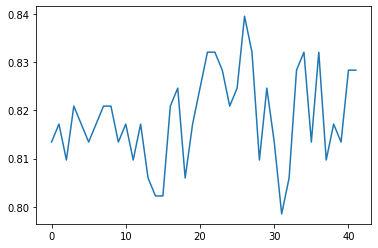

In [809]:
plt.plot(ac)

In [713]:
pred_1 = pred

In [675]:
pred_2 = pred

In [676]:
def make_prediction( prediction):
    final = np.zeros(len(prediction[0]))
    prediction = np.array(prediction)
    size = len(prediction[0])
    prediction = prediction.T
    for i in range(size):
        if (prediction[i].mean() > 0.5):
            final[i] = 1
        else :
            final[i] = 0


    return final

In [677]:
anses = make_prediction(np.vstack((pred_1, pred_2)))

In [678]:
metrics.accuracy_score(anses, np.array(y_test))

0.832089552238806

# Make ans

In [810]:
data_for_ans = pd.read_csv("titanic/test.csv")

In [811]:
data_zeros_ans = data_for_ans[num_columns].fillna(0)

In [812]:
data_zeros_ans

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
...,...,...
413,0.0,8.0500
414,39.0,108.9000
415,38.5,7.2500
416,0.0,8.0500


In [813]:
data_cat_ans = data_for_ans[cat_columns].fillna('NA').astype(str)

In [814]:
data_cat_ans = data_for_ans[cat_columns].astype(str)
for col in data_cat_ans.columns:
    data_cat_ans[col].fillna(data_cat_ans[col].mode(), inplace = True)

data_mean_ans =data_for_ans[num_columns]
for col in data_mean_ans.columns:
    data_mean_ans[col].fillna(data_mean_ans[col].mean(), inplace = True)

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [815]:
data_cat_oh_ans = encoder_2.transform(data_cat_ans.T.to_dict().values())

In [816]:
data_zeros_ans_1 = np.column_stack((scaler_mean.transform(data_zeros_ans), data_cat_oh_ans))


In [817]:
_,final_ans = est.predict(data_zeros_ans_1)
final_ans = np.array(final_ans, dtype = int)

In [818]:
final_data_1 = pd.DataFrame(data_for_ans['PassengerId'])

In [819]:
final_data_1["Survived"] = pd.Series(final_ans, index=final_data_1.index, dtype=int)

In [820]:
final_data_1.to_csv("submission.csv", sep=',', index=False)

In [821]:
final_data_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [789]:
data_for_ans['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [790]:
final_ans

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [801]:
idx = np.linspace(0, len(et)-1,len(et), dtype  = int )

In [754]:
a = final_ans

In [822]:
idx[final_ans != et]

array([ 21,  33,  41,  49,  58,  68,  72,  76,  77,  85,  93,  94,  98,
       108, 116, 118, 127, 133, 144, 146, 148, 151, 157, 158, 163, 169,
       171, 173, 181, 191, 192, 197, 201, 205, 211, 213, 219, 225, 244,
       263, 266, 274, 284, 288, 289, 290, 291, 292, 301, 323, 332, 339,
       342, 344, 347, 354, 359, 365, 366, 369, 383, 405, 409, 412, 413,
       416])

In [824]:
len(idx[final_ans != et])

66

In [823]:
idx[final_ans != a] 

array([108, 211, 291, 333, 347])

In [795]:
data_for_check = pd.read_csv("submission 2.csv")

In [796]:
data_for_check

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [797]:
et = np.array(data_for_check["Survived"])

In [799]:
0.77511*len(et)

323.99598

In [800]:
len(et) - 324

94